# Task 3a Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
filters = [ 'f090w', 'f150w', 'f200w','f277w','f356w','f444w']

In [3]:
cat = pickle.load(open('data/cat.p', 'rb'))  # read in signal catalogue created in task 2f

In [4]:
fluxes = {f: cat[f'{f}_signal'] for f in filters} # convert to flux/nJy
errors = {f: cat[f'{f}_noise'] for f in filters}

In [5]:
r1 = fluxes['f150w']/fluxes['f200w'] # break colour (mag) - usually on y-axis
r2 = fluxes['f090w']/fluxes['f150w'] # slope colour (mag) - usually on x-axis

In [6]:
r1_errors = np.sqrt((r1**2)*((errors['f150w']**2/fluxes['f150w']**2)+(errors['f200w']**2/fluxes['f200w']**2)))  #add uncertainties using error propagation
r2_errors = np.sqrt((r2**2)*((errors['f090w']**2/fluxes['f090w']**2)+(errors['f150w']**2/fluxes['f150w']**2)))

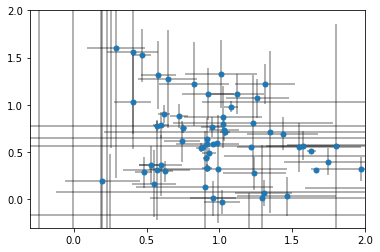

<Figure size 432x288 with 0 Axes>

In [7]:
#Plot all objects
markers,caps,bars = plt.errorbar(r1, r2, xerr = r1_errors, yerr = r2_errors, fmt='o',markersize = 5, ecolor='black')
[bar.set_alpha(0.4) for bar in bars]
plt.xlim([-0.3,2])
plt.ylim([-0.3,2])
plt.show()
plt.savefig('figures/3a.pdf')